[*********************100%%**********************]  1 of 1 completed


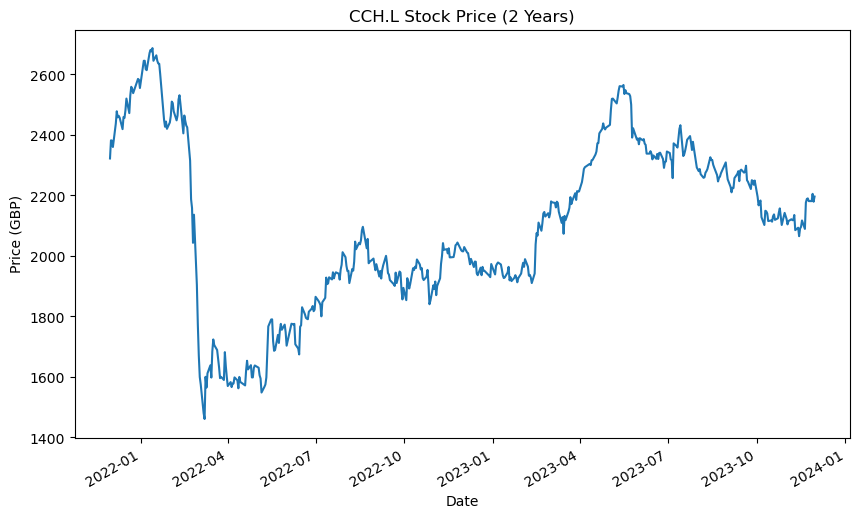

Annualized Average Return: 1.08%
Annualized Standard Deviation: 27.80%


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy.stats import norm
import math

# Set the ticker and time period
ticker = 'CCH.L'
end_date = datetime.today()
start_date = end_date - timedelta(days=2*365)  # Two years from today

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date)

# Plot the closing prices
data['Close'].plot(title=f'{ticker} Stock Price (2 Years)', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Price (GBP)')
plt.show()

# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change()

# Calculate annualized average return
avg_daily_return = data['Daily Return'].mean()
annualized_avg_return = (1 + avg_daily_return) ** 252 - 1  # 252 trading days in a year

# Calculate annualized standard deviation
annualized_std_dev = data['Daily Return'].std() * np.sqrt(252)

print(f"Annualized Average Return: {annualized_avg_return * 100:.2f}%")
print(f"Annualized Standard Deviation: {annualized_std_dev * 100:.2f}%")


In [3]:
import numpy as np
import scipy.stats as si
import yfinance as yf

def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    Calculate the Black-Scholes option price.

    :param S: Current stock price
    :param K: Strike price
    :param T: Time to expiration in years
    :param r: Risk-free interest rate
    :param sigma: Volatility of the stock
    :param option_type: 'call' or 'put'
    :return: Option price
    """
    # Calculate d1 and d2
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Calculate option price
    if option_type == 'call':
        option_price = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    elif option_type == 'put':
        option_price = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price

# Example usage
ticker = 'CCH.L'
data = yf.download(ticker, period="1d")
current_stock_price = data['Close'][-1]  # Latest closing price

# Inputs for the Black-Scholes model
strike_price = 2000  # Example strike price
time_to_expiration = 1  # 1 year until expiration
risk_free_rate = 0.0417  # Example risk-free rate (4.17%) UK Gilt 10 Year Yield
volatility = 0.278  # Example volatility (20%)

# Calculate option price
call_option_price = black_scholes(current_stock_price, strike_price, time_to_expiration, risk_free_rate, volatility, 'call')
put_option_price = black_scholes(current_stock_price, strike_price, time_to_expiration, risk_free_rate, volatility, 'put')

print(f"Call Option Price: {call_option_price}")
print(f"Put Option Price: {put_option_price}")


[*********************100%%**********************]  1 of 1 completed
Call Option Price: 392.4146343341429
Put Option Price: 114.7296036543662
